# Expert Agent Heuristic
A set of well known heuristics with some greedy search over the reduced action space is used to solve the overload and congestion problems.

## How to install

Create a virtual environment
```bash
conda create -n expert_agent python=3.10
conda activate venv_gnn
```

Clone and install the LJN agent (javaness winning solution adapted for the following scenario):

```bash
git clone git@github.com:Mleyliabadi/l2rpn-2023-ljn-agent.git
cd l2rpn-2023-ljn-agent
pip install -U .
```

Then clone this repository and install the dependencies:

```bash
git clone git@github.com:AI4REALNET/T2.1_deep_expert.git
pip install -U .
```

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import grid2op
from grid2op.Runner import Runner
from lightsim2grid.lightSimBackend import LightSimBackend
from LJNAgent.modules.rewards import MaxRhoReward
from ExpertAgent import ExpertAgentHeuristic
from ExpertAgent import ASSETS
from ExpertAgent.utils.helper_functions import plot_runner_results

### Instantiate the `ai4realnet_small`
To be order to use this environment, you should clone [this repository](git@github.com:AI4REALNET/grid2op-scenario.git). Then you could copy the `ai4realnet_small` in your home directory for the simplest configuration in this path: `/home/<USERNAME>/data_grid2op/ai4realnet_small`.

In [2]:
env_name = "ai4realnet_small"
reward_class = MaxRhoReward
seed = 12345
env = grid2op.make(env_name,
                   backend=LightSimBackend(),
                   reward_class=reward_class)
env.seed(seed)
obs = env.reset()

/home/milad/miniconda3/envs/T2.1/lib/python3.12/site-packages/lightsim2grid/gridmodel/from_pandapower/_aux_add_trafo.py:86: UserWarning: There were some Nan in the pp_net.trafo["tap_step_degree"], they have been replaced by 0
  warnings.warn("There were some Nan in the pp_net.trafo[\"tap_step_degree\"], they have been replaced by 0")
/home/milad/miniconda3/envs/T2.1/lib/python3.12/site-packages/lightsim2grid/gridmodel/from_pandapower/_aux_add_slack.py:126: UserWarning: We found either some slack coefficient to be < 0. or they were all 0.We set them all to 1.0 to avoid such issues
  warnings.warn("We found either some slack coefficient to be < 0. or they were all 0."


### Instantiate the heuristic agent

In [3]:
agent = ExpertAgentHeuristic(action_space=env.action_space,
                             env=env,
                             rho_danger= 0.99,
                             rho_safe= 0.9,
                             action_space_expert=os.path.join(ASSETS, "ai4realnet_small_expert_actions_vector.npz"),
                             action_space_unsafe=os.path.join(ASSETS, "attacking_teacher_actionspace.npz")
                             )

### Evaluate the agent using the grid2op Runner

In [ ]:
verbose = True
runner_params = env.get_params_for_runner()
runner_params["verbose"] = verbose
logs_path = "logs"
max_steps = env.chronics_handler.max_episode_duration()

if logs_path is not None:
    os.makedirs(logs_path, exist_ok=True)
    

runner = Runner(**runner_params, 
                agentClass=None, 
                agentInstance=agent)

results = runner.run(
    path_save=logs_path,
    nb_episode=15, # Evaluate for 15 episodes
    nb_process=1,
    max_iter=max_steps,
    pbar=verbose,
    env_seeds=np.arange(15)
)

episode: 100%|██████████| 15/15 [06:50<00:00, 27.38s/it]


### Analyse the results

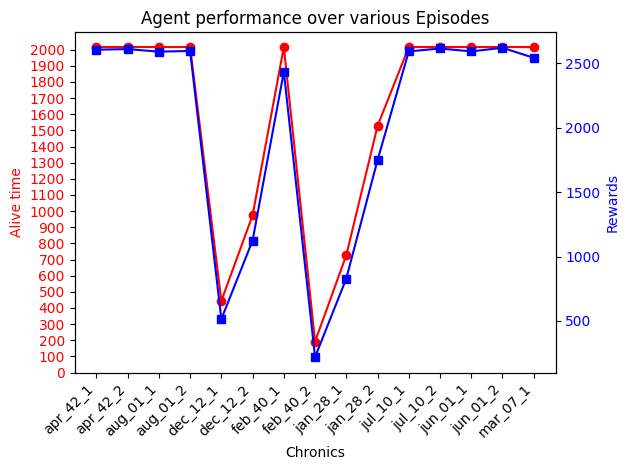

In [ ]:
plot_runner_results(results, max_steps)